### Part 1. Algorithmic Implementation - Conjugate Gradient Algorithm.

In [1]:
# Install libraries
%matplotlib inline
import numpy as np
from sympy import *
from scipy import stats
from scipy.optimize import fmin
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
import time

### 1) func = x1^2 + x2^2 + x3^2      and     x0 = 1,1,1

In [2]:
################################################################################################
#                                        Trivariate Calculation                                #
################################################################################################

# Start at Example:
#x = np.matrix('1;1;1')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2, x3 = symbols('x1:4')
fn = x1**2 + x2**2 + x3**2

# Lambdify objective function
f = lambdify('x1, x2, x3', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2) 
fnDiffx3 = fn.diff(x3) 
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2], [fnDiffx3]])

# Lambdify
fprime = lambdify('x1, x2, x3', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2) ; fnHessx13 = diff(diff(fn, x1),x3)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) ; fnHessx23 = diff(diff(fn, x2),x3)
fnHessx31 = diff(diff(fn, x3),x1) ; fnHessx32 = diff(diff(fn, x3),x2) ; fnHessx33 = diff(diff(fn, x3),x3) 
fnHess = Matrix([[fnHessx11, fnHessx12, fnHessx13], [fnHessx21, fnHessx22, fnHessx23], [fnHessx31, fnHessx32, fnHessx33]])

# Lambdify
fHess = lambdify('x1, x2, x3', fnHess)

# Calculate Example
#f(x.item((0,0)) , x.item((1,0)) , x.item((2,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))

In [3]:
# Start at
x = np.matrix('1;1;1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)) , x.item((2,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))
beta = np.matrix('0')
direction = np.matrix('0;0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Grad
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0)) , xold.item((2,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    #Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[1]
 [1]
 [1]]


Iteration:  1
Direction:  [[-2]
 [-2]
 [-2]]
Step Length:  0.5
New Value:  [[ 0.]
 [ 0.]
 [ 0.]]




Local minimum occurs at: [[ 0.]
 [ 0.]
 [ 0.]]
Number of steps: 1
runtime:  0.006981611251831055


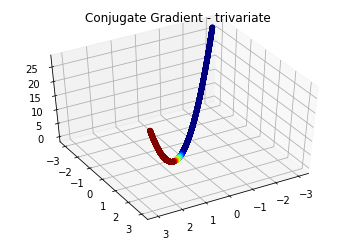

In [4]:
# create the figure, add a 3d axis, set the viewing angle
x = np.linspace(-3,3,10000)
y = np.linspace(-3,3,10000)
z = np.linspace(-3,3,10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,60)

#ax.scatter(x, y, f(x,y,z), c='b', marker='o')
ax.scatter(x, y, f(x,y,z), facecolors=plt.cm.jet(z))
#ax.scatter(x, y, z, facecolors=plt.cm.jet(f(x,y,z)))
plt.title("Conjugate Gradient - trivariate")
plt.show()

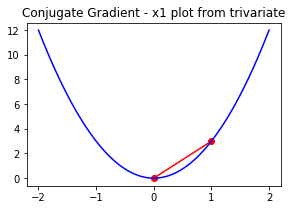

In [5]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)
z = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y,z), c="b")
plt.title("Conjugate Gradient - x1 plot from trivariate")

### 2) func = x1^2 + 2*x2^2 - 2*x1*x2 - 2*x2  and x0 = 0,0

In [6]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('0;0')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = x1**2 + 2*x2**2 - 2*x1*x2 - 2*x2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [7]:
# Start at
x = np.matrix('0;0')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))
beta = np.matrix('0')
direction = np.matrix('0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Gradient
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    #Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[0]
 [0]]


Iteration:  1
Direction:  [[0]
 [2]]
Step Length:  0.25
New Value:  [[ 0. ]
 [ 0.5]]




Iteration:  2
Direction:  [[ 1. ]
 [ 0.5]]
Step Length:  1.0
New Value:  [[ 1.]
 [ 1.]]




Local minimum occurs at: [[ 1.]
 [ 1.]]
Number of steps: 2
runtime:  0.015011072158813477


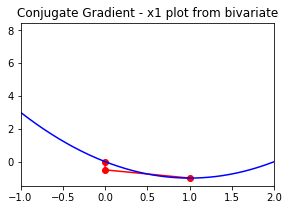

In [8]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-1,2])
plt.title("Conjugate Gradient - x1 plot from bivariate")

### 3) func = 100*(x2 - x1**2)^2 + (1-x1)^2 and x0 = -1.2,1
#### Notice this is a polynomial problem. We have to update Q (or Hessian) by Fletcher-Reeves method.

In [9]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('-1.2;1')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = 100*(x2 - x1**2)**2 + (1-x1)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [10]:
# Start at
x = np.matrix('-1.2;1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))
beta = np.matrix('0')
direction = np.matrix('0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Gradient
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[-1.2]
 [ 1. ]]


Iteration:  1
Direction:  [[ 215.6]
 [  88. ]]
Step Length:  0.0006646686267390898
New Value:  [[-1.05669744]
 [ 1.05849084]]




Iteration:  2
Direction:  [[ 0.02622456]
 [-0.07125039]]
Step Length:  -1.1280271105073234
New Value:  [[-1.08627946]
 [ 1.13886321]]




Iteration:  3
Direction:  [[  83.8338206 ]
 [-159.63911407]]
Step Length:  0.0023163993620208406
New Value:  [[-0.89208685]
 [ 0.76907526]]




Iteration:  4
Direction:  [[ -50.18812974]
 [ 126.29681386]]
Step Length:  2.2039236837590982e-05
New Value:  [[-0.89319296]
 [ 0.77185875]]




Iteration:  5
Direction:  [[ 46.43859788]
 [-78.82845856]]
Step Length:  0.006554392432949039
New Value:  [[-0.58881617]
 [ 0.2551861 ]]




Iteration:  6
Direction:  [[ -76.81909044]
 [ 190.6854072 ]]
Step Length:  0.0007110152018585622
New Value:  [[-0.64343571]
 [ 0.39076632]]




Iteration:  7
Direction:  [[ 19.03966239]
 [-19.60456715]]
Step Length:  0.009598497060411604
New Value:  [[-0.4

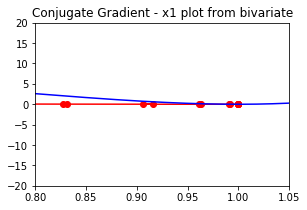

In [11]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-20,20])
plt.xlim([0.8,1.05])
plt.title("Conjugate Gradient - x1 plot from bivariate")

### 4) func = (x1+x2)^4 + x2^2 and x0 = 2,-2
#### Notice this is a polynomial problem. We have to update Q (or Hessian) by Fletcher-Reeves method.

In [12]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = (x1+x2)**4 + x2**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [13]:
# Start at
x = np.matrix('2;-2')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))
beta = np.matrix('0')
direction = np.matrix('0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Gradient
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 2]
 [-2]]


Iteration:  1
Direction:  [[0]
 [4]]
Step Length:  0.5
New Value:  [[ 2.]
 [ 0.]]




Iteration:  2
Direction:  [[-32.]
 [  0.]]
Step Length:  0.020833333333333332
New Value:  [[ 1.33333333]
 [ 0.        ]]




Iteration:  3
Direction:  [[ 9.48148148]
 [-9.48148148]]
Step Length:  0.0
New Value:  [[ 1.33333333]
 [ 0.        ]]




Iteration:  4
Direction:  [[ -1.89629630e+01]
 [  1.24344979e-14]]
Step Length:  0.023437499999999997
New Value:  [[  8.88888889e-01]
 [  2.91433544e-16]]




Iteration:  5
Direction:  [[ 2.80932785]
 [-2.80932785]]
Step Length:  1.6880551369566417e-16
New Value:  [[  8.88888889e-01]
 [ -1.82796486e-16]]




Iteration:  6
Direction:  [[ -5.61865569e+00]
 [  3.10862447e-15]]
Step Length:  0.052734375000000014
New Value:  [[  5.92592593e-01]
 [ -1.88651178e-17]]




Iteration:  7
Direction:  [[ 0.83239344]
 [-0.83239344]]
Step Length:  1.6023335870330632e-16
New Value:  [[  5.92592593e-01]
 [ -1.52242314e-16]]




Itera

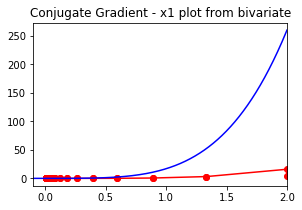

In [14]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-0.1,2])
plt.title("Conjugate Gradient - x1 plot from bivariate")

### 5.1) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 1
#### Notice this is a polynomial problem. We have to update Q (or Hessian) by Fletcher-Reeves method.

In [15]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=1
fn = (x1-1)**2 + (x2-1)**2 + 1*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [16]:
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))
beta = np.matrix('0')
direction = np.matrix('0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Gradient
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[ -7.]
 [ 11.]]
Step Length:  0.041242115477923336
New Value:  [[ 0.71130519]
 [-0.54633673]]




Iteration:  2
Direction:  [[ 1.12769082]
 [ 0.96062551]]
Step Length:  0.30463128838522474
New Value:  [[ 1.0548351 ]
 [-0.25370014]]




Iteration:  3
Direction:  [[-2.2298676 ]
 [ 4.97408707]]
Step Length:  0.0952856764625172
New Value:  [[ 0.84236066]
 [ 0.22025911]]




Iteration:  4
Direction:  [[-0.58237942]
 [-0.70460607]]
Step Length:  0.004472647546223532
New Value:  [[ 0.83975588]
 [ 0.21710766]]




Iteration:  5
Direction:  [[-0.96183061]
 [ 1.61955483]]
Step Length:  0.19786952055993176
New Value:  [[ 0.64943892]
 [ 0.53756819]]




Iteration:  6
Direction:  [[-0.31083887]
 [-0.37730938]]
Step Length:  0.08030245266883347
New Value:  [[ 0.62447779]
 [ 0.50726932]]




Iteration:  7
Direction:  [[-0.21016131]
 [ 0.21719296]]
Step Length:  0.270595505242792
New Value:  [[ 0.56760909]
 [ 0.56604076]]




Iterati

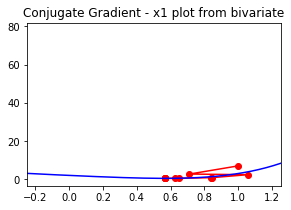

In [17]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-0.25,1.25])
plt.title("Conjugate Gradient - x1 plot from bivariate")

### 5.2) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 10
#### Notice this is a polynomial problem. We have to update Q (or Hessian) by Fletcher-Reeves method.

In [18]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=10
fn = (x1-1)**2 + (x2-1)**2 + 10*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [19]:
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))
beta = np.matrix('0')
direction = np.matrix('0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Gradient
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-70.]
 [ 74.]]
Step Length:  0.004312637991115367
New Value:  [[ 0.69811534]
 [-0.68086479]]




Iteration:  2
Direction:  [[ 1.17538711]
 [ 1.15529502]]
Step Length:  0.04458033365816353
New Value:  [[ 0.75051449]
 [-0.62936135]]




Iteration:  3
Direction:  [[-19.64630932]
 [ 22.2473529 ]]
Step Length:  0.00945839077451951
New Value:  [[ 0.56469202]
 [-0.41893719]]




Iteration:  4
Direction:  [[ 0.74923884]
 [ 0.8196813 ]]
Step Length:  0.1463348357481022
New Value:  [[ 0.67433176]
 [-0.29898927]]




Iteration:  5
Direction:  [[-4.90068755]
 [ 8.72068675]]
Step Length:  0.021328797345672144
New Value:  [[ 0.56980599]
 [-0.11298751]]




Iteration:  6
Direction:  [[ 0.1859164 ]
 [ 0.27476329]]
Step Length:  0.48360991226320565
New Value:  [[ 0.659717  ]
 [ 0.01989075]]




Iteration:  7
Direction:  [[-1.18337934]
 [ 6.29699849]]
Step Length:  0.03893977521479964
New Value:  [[ 0.61363648]
 [ 0.26509445]]




Ite

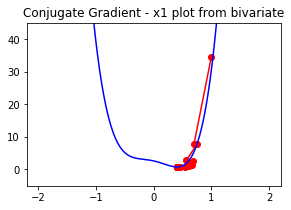

In [20]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-5,45])
plt.title("Conjugate Gradient - x1 plot from bivariate")

### 5.3) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 100
#### Notice this is a polynomial problem. We have to update Q (or Hessian) by Fletcher-Reeves method.

In [21]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=100
fn = (x1-1)**2 + (x2-1)**2 + 100*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [22]:
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = pow(10,-8)
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))
beta = np.matrix('0')
direction = np.matrix('0;0')

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Conjugate Gradient
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal + beta.item((0,0)) * direction
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Update Conjugate Estimates for next iteration    
    fprimeVal = np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0))))    
    
    beta = (np.transpose(direction) * Q * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    Q = np.asmatrix(fHess(xnew.item((0,0)) , xnew.item((1,0)))) # Update Q for polynomial
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-700.]
 [ 704.]]
Step Length:  0.0004344073160564168
New Value:  [[ 0.69591488]
 [-0.69417725]]




Iteration:  2
Direction:  [[ 1.1791636 ]
 [ 1.17711644]]
Step Length:  0.004634711228185244
New Value:  [[ 0.70137996]
 [-0.68872165]]




Iteration:  3
Direction:  [[-199.21445711]
 [ 201.83976215]]
Step Length:  0.0009421780603045454
New Value:  [[ 0.51368447]
 [-0.49855266]]




Iteration:  4
Direction:  [[ 0.83224003]
 [ 0.84035475]]
Step Length:  0.016239040129996354
New Value:  [[ 0.52719925]
 [-0.4849061 ]]




Iteration:  5
Direction:  [[-52.43850197]
 [ 56.10914152]]
Step Length:  0.0019375317264889687
New Value:  [[ 0.42559799]
 [-0.37619286]]




Iteration:  6
Direction:  [[ 0.79112137]
 [ 0.83350505]]
Step Length:  0.061049930441397934
New Value:  [[ 0.47389589]
 [-0.32530744]]




Iteration:  7
Direction:  [[-10.1367642 ]
 [ 17.38181947]]
Step Length:  0.0036687104946790746
New Value:  [[ 0.43670704]
 [-0.

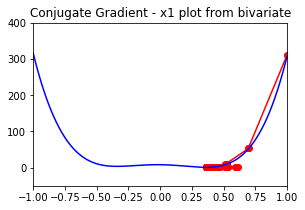

In [23]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-50,400])
plt.xlim([-1,1])
plt.title("Conjugate Gradient - x1 plot from bivariate")